<h1>Importing Libraries</h1>


In [87]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras_facenet import FaceNet
from dnn_face_detection import detect_face
from sklearn.metrics.pairwise import cosine_similarity
import glob

<h2> Image Checker to Filter </h2>

In [88]:
img_checker=cv2.imread('dataset/checker.jpg')

<h3>For Plotting</h3>

In [89]:

def plot_img(img):
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

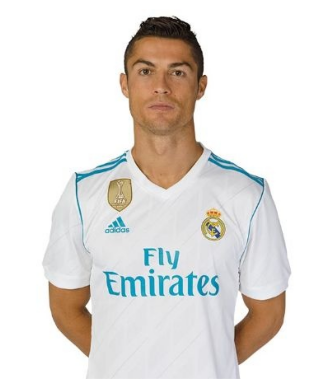

In [90]:
plot_img(img_checker)

<h3>For Face Detection</h3>

In [91]:
def face_detection(img):
    faces=detect_face(img)
    
    for bounding_box in faces:
        x=int(bounding_box[0])
        y=int(bounding_box[1])
        x2=int(bounding_box[2])
        y2=int(bounding_box[3])
        
        crop_face=img[y:y2,x:x2]
        crop_face=cv2.resize(crop_face,(160,160))
        return crop_face 

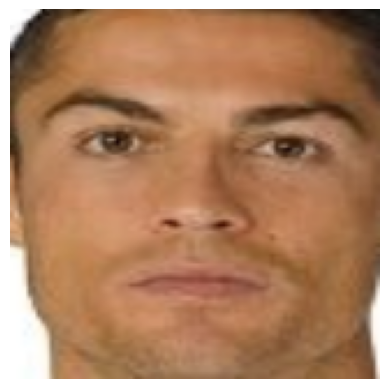

In [92]:
checker_croped=face_detection(img_checker)
plot_img(checker_croped)

<h3> Read all File </h3>

In [93]:
file_type=['JPG','JPEG','PNG','JFIF']
images=[]
#for copying later
filename=[]
for format in file_type:
    for path in glob.glob(f"dataset/images/*.{format}"):
        filename.append(path)
        images.append(cv2.imread(path))

<h3> For Randomness </h3>

In [94]:
import random
def rand():
    return int(np.random.binomial(n=1,p=0.1,size=[1]))

<h3>Plotting The Images At Random</h3>

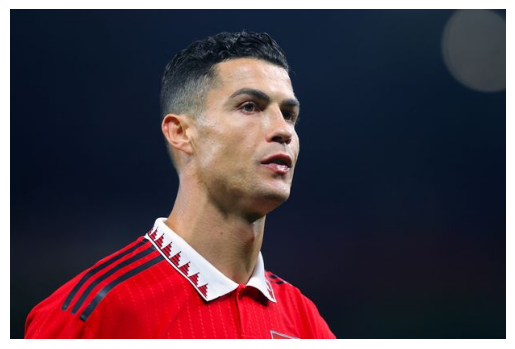

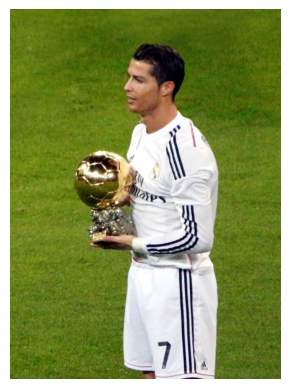

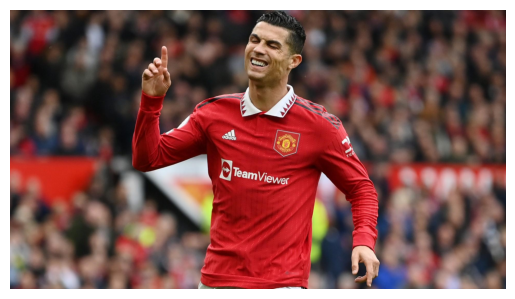

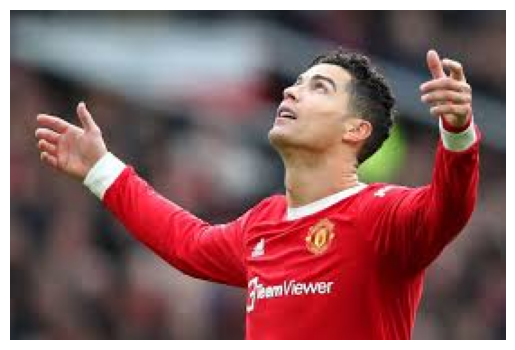

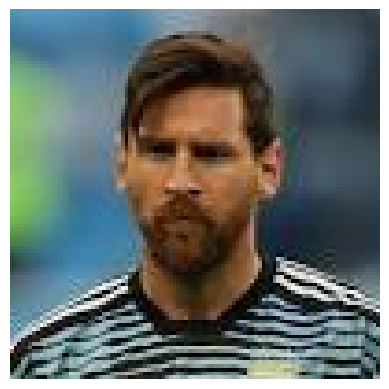

In [95]:
count =0
for i in range (len(images)):
    if rand() and count<5:
        plot_img(images[i])
        count+=1

<h3>Detecting Face on Images </h3>

In [96]:
images_cropped=[]
for i in range (len(images)):
    img_temp=face_detection(images[i])
    images_cropped.append(img_temp)


<h3>Plotting Detected Faces at Random </h3>

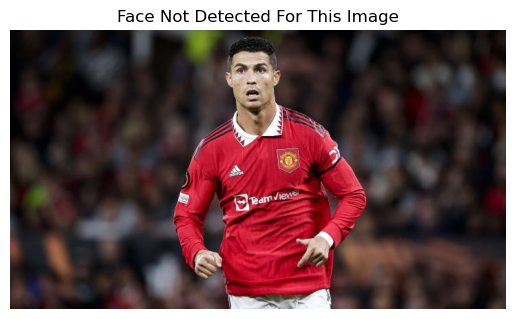

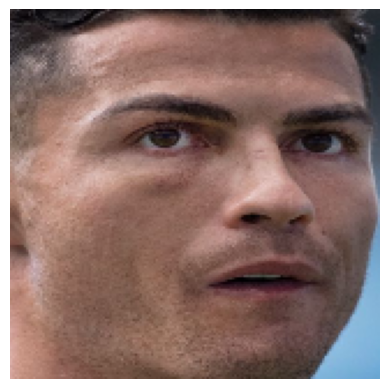

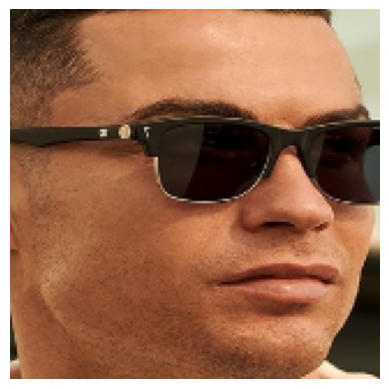

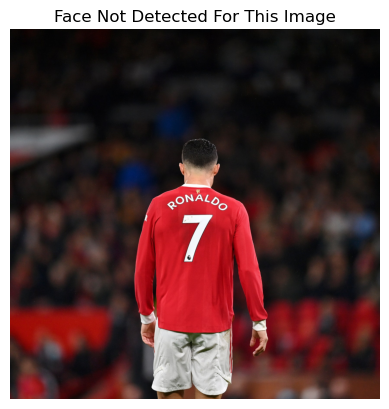

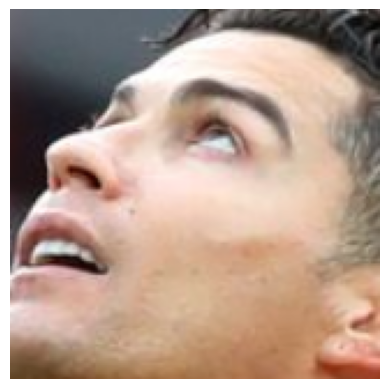

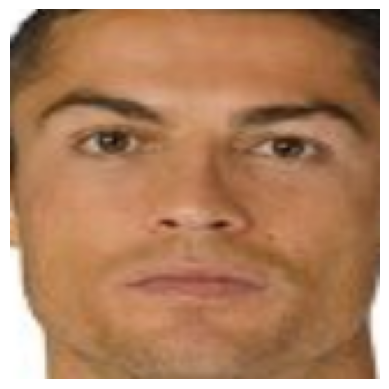

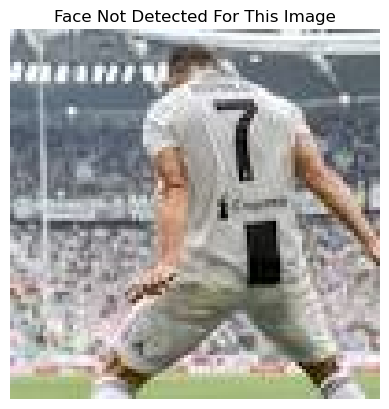

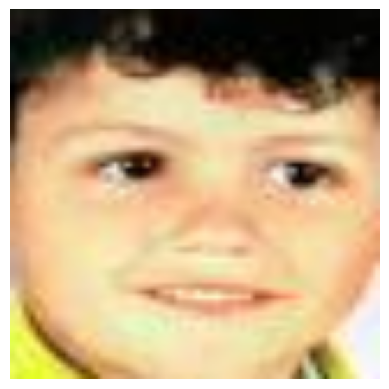

In [104]:
count =0
for i in range (len(images)):
    if rand() and count<5:
        try:
            plot_img(images_cropped[i])
        except:
            plt.title(f"Face Not Detected For This Image")
            plot_img(images[i])
            continue
        count+=1

<h3>Initalizing FaceNet</h3>

In [98]:
embedder=FaceNet()


<h3>DetermineScore</h3>

In [99]:
def score(checker_embedding,check):
    try:
        check_embedding=embedder.embeddings(np.expand_dims(check,axis=0))
        score_tmp=cosine_similarity(checker_embedding,check_embedding)
        return(score_tmp[0][0])
    except:
        #for face not detected returning similarity score as 0
        return 0    

<h3>Save Files With Same FileName and Similarity Score Using Earlier Filename variable</h3>

In [100]:
def copy_to_filter(img,score,filename):
    
    #save with score
    dest_dir=f'dataset/filter/{score}%{filename}'
    cv2.imwrite(dest_dir,img)
    
    

In [101]:
def copy_to_nonfilter(img,score,filename):
    
    #save with score
    dest_dir=f'dataset/non_filter/{score}%{filename}'
    cv2.imwrite(dest_dir,img)    
    

In [103]:
checker_embedding=embedder.embeddings(np.expand_dims(checker_croped,axis=0))
for i in range(len(images)):
    check_score=score(checker_embedding,images_cropped[i])
    check_score=round(check_score*100,2)
    
    #save in filter
    if(check_score>=70):
        filename_curr=filename[i].partition(chr(92))[2]
        copy_to_filter(images[i],check_score,filename_curr)
    #save in non filter
    else:
        filename_curr=filename[i].partition(chr(92))[2]
        copy_to_nonfilter(images[i],check_score,filename_curr)
        

1/1 [==============================] - 0s 57ms/step


<h3>Showing Simlarity Images</h3>

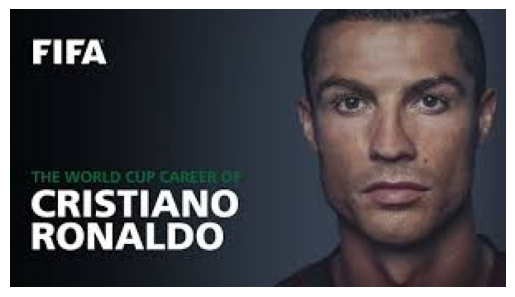

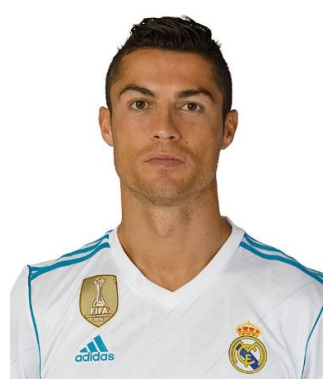

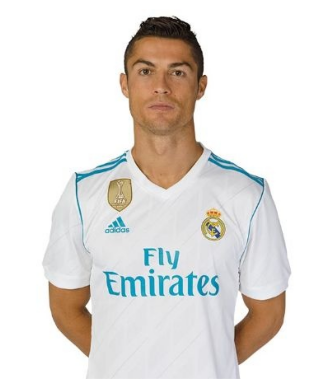

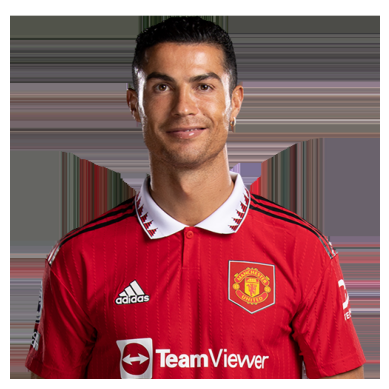

In [111]:
file_type=['JPG','JPEG','PNG','JFIF']
images=[]

for format in file_type:
    for path in glob.glob(f"dataset/filter/*.{format}"):
        filename.append(path)
        images.append(cv2.imread(path))
        
count=0
for i in range(len(images)):
    if rand() and count<5:
        count+=1
        plot_img(images[i])

<h3>Showing Low_Similarity Images</h3>

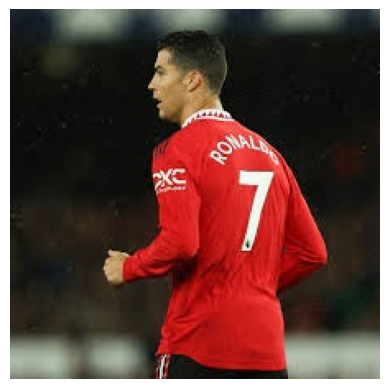

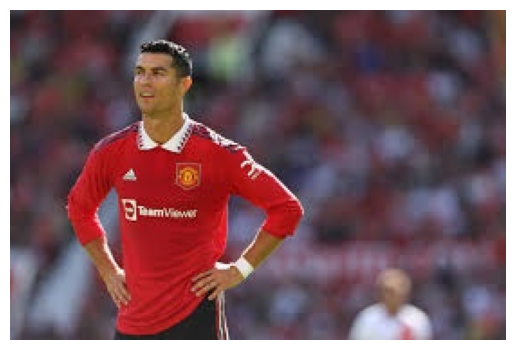

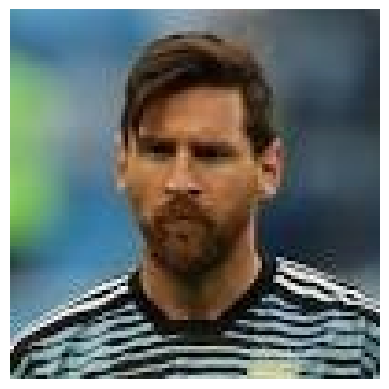

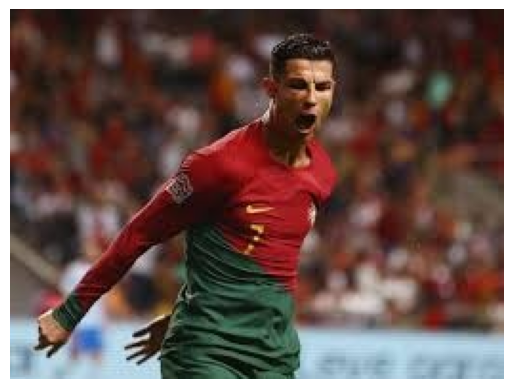

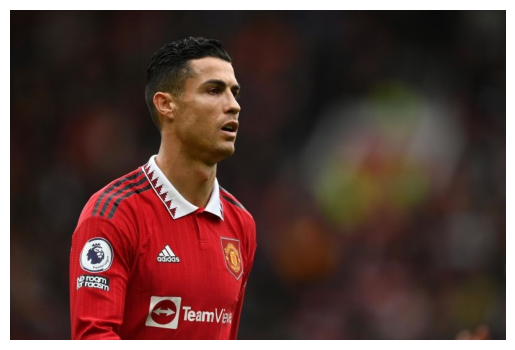

In [112]:
file_type=['JPG','JPEG','PNG','JFIF']
images=[]

for format in file_type:
    for path in glob.glob(f"dataset/non_filter/*.{format}"):
        filename.append(path)
        images.append(cv2.imread(path))
        
count=0
for i in range(len(images)):
    if rand() and count<5:
        count+=1
        plot_img(images[i])